In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-data/BKB_WaterQualityData_2020084.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [3]:
df = pd.read_csv('/kaggle/input/water-quality-data/BKB_WaterQualityData_2020084.csv')

* **Read_Date : The date on which the water quality measurement was taken**
* **Salinity (ppt) : Salinity of the water measured in parts per thousand**
* **Dissolved Oxygen (mg/L) : Amount of oxygen dissolved in the water, measured in milligrams per liter**
* **pH (standard units) : The acidity or alkalinity of the water on a pH scal**
* **Secchi Depth (m) : The depth at which a Secchi disk disappears from view, used to measure water transparency**
* **Water Depth (m) : The depth of the water at the point of measurement**
* **Water Temp (?C) : Temperature of the water in Celsius at the time of measurement**
* **Air Temp-Celsius : Air temperature in Celsius and Fahrenheit at the time of measurement**
* **Air Temp (?F) : Air temperature in Celsius and Fahrenheit at the time of measurement**
* **Time (24:00) : Time of day when the measurement was taken**
* **AirTemp (C) : Redundant column for air temperature in Celsius**
* **Year : The year in which the measurement was taken**

In [4]:
df.shape

(2371, 17)

In [5]:
df.describe()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

**Missing Value Check**

In [7]:
df.isnull().sum()

Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64

**Duplicated value check**

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


# **2. Data Transform**

In [10]:
df.drop(columns=['Site_Id', 'Unit_Id','Air Temp-Celsius', 'Field_Tech', 'DateVerified', 'WhoVerified'], inplace=True) 

In [11]:
df = df.rename(columns = {'Salinity (ppt)': 'Salinity_ppt',
                          'Dissolved Oxygen (mg/L)' : 'Dissolved Oxygen_mg/L',
                          'pH (standard units)':'pH',
                          'Secchi Depth (m)': 'Secchi Depth_m',
                          'Water Depth (m)': 'Water Depth_m',
                          'Water Temp (?C)':'Water Temp_C',
                          'Air Temp (?F)':'Air Temp_F',
                          'Time (24:00)':'Time',
                          'AirTemp (C)':'AirTemp_C'}
              )

In [12]:
df['Read_Date'] = pd.to_datetime(df['Read_Date']) 
df['Year'] = df['Year'].astype(int)

In [13]:
df['Salinity_ppt'] = df['Salinity_ppt'].fillna(df['Salinity_ppt'].mean())
df['Dissolved Oxygen_mg/L'] = df['Dissolved Oxygen_mg/L'].fillna(df['Dissolved Oxygen_mg/L'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['Secchi Depth_m'] = df['Secchi Depth_m'].fillna(df['Secchi Depth_m'].mean())
df['Water Depth_m'] = df['Water Depth_m'].fillna(df['Water Depth_m'].mean())
df['Water Temp_C'] = df['Water Temp_C'].fillna(df['Water Temp_C'].mean())
df['Air Temp_F'] = df['Air Temp_F'].fillna(df['Air Temp_F'].mean())

In [14]:
df = df.dropna()

In [15]:
df = df.reindex(['Read_Date','Salinity_ppt','Dissolved Oxygen_mg/L','pH','Secchi Depth_m',
            'Water Depth_m','Water Temp_C','Air Temp_F','AirTemp_C','Time','Year'],axis=1)

**Data Check**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 0 to 2370
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Read_Date              2305 non-null   datetime64[ns]
 1   Salinity_ppt           2305 non-null   float64       
 2   Dissolved Oxygen_mg/L  2305 non-null   float64       
 3   pH                     2305 non-null   float64       
 4   Secchi Depth_m         2305 non-null   float64       
 5   Water Depth_m          2305 non-null   float64       
 6   Water Temp_C           2305 non-null   float64       
 7   Air Temp_F             2305 non-null   float64       
 8   AirTemp_C              2305 non-null   float64       
 9   Time                   2305 non-null   object        
 10  Year                   2305 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 216.1+ KB


In [17]:
df.isnull().sum()

Read_Date                0
Salinity_ppt             0
Dissolved Oxygen_mg/L    0
pH                       0
Secchi Depth_m           0
Water Depth_m            0
Water Temp_C             0
Air Temp_F               0
AirTemp_C                0
Time                     0
Year                     0
dtype: int64

In [18]:
df.head()

,Read_Date,Salinity_ppt,Dissolved Oxygen_mg/L,pH,Secchi Depth_m,Water Depth_m,Water Temp_C,Air Temp_F,AirTemp_C,Time,Year
0,1994-01-03,1.3,11.7,7.3,0.40,0.40,5.9,46.40,8.0,11:00,1994
1,1994-01-31,1.5,12.0,7.4,0.20,0.35,3.0,36.68,2.6,11:30,1994
2,1994-02-07,1.0,10.5,7.2,0.25,0.60,5.9,45.68,7.6,9:45,1994
4,1994-02-28,1.0,12.6,7.2,0.20,0.40,1.6,32.00,0.0,10:30,1994
5,1994-03-07,1.0,9.9,7.1,0.20,0.90,9.7,59.36,15.2,10:00,1994


# **3. Data Visualization**

In [19]:
num_cols = df.select_dtypes(include=['float64']).columns

**Histogram**

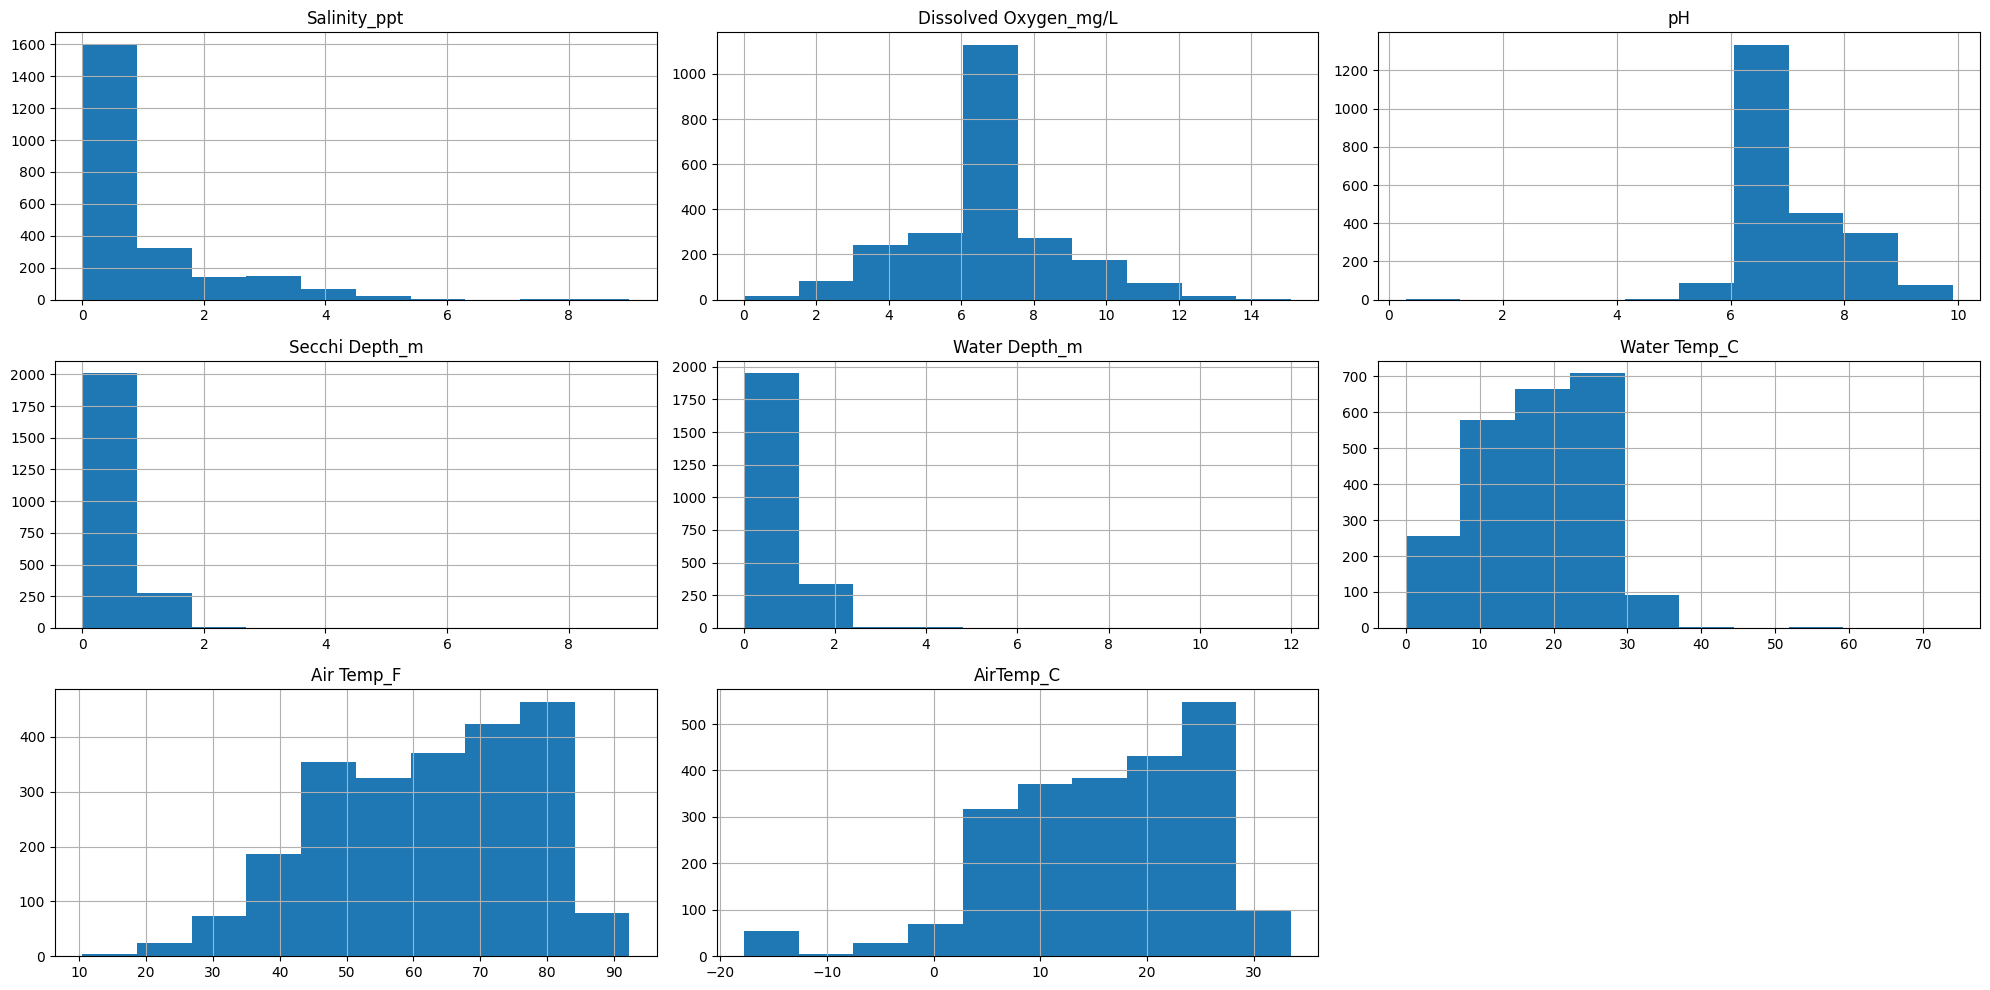

In [21]:
df.iloc[:,1:9].hist(figsize=(20,10))
plt.tight_layout()
plt.show()

------

**Boxplot**

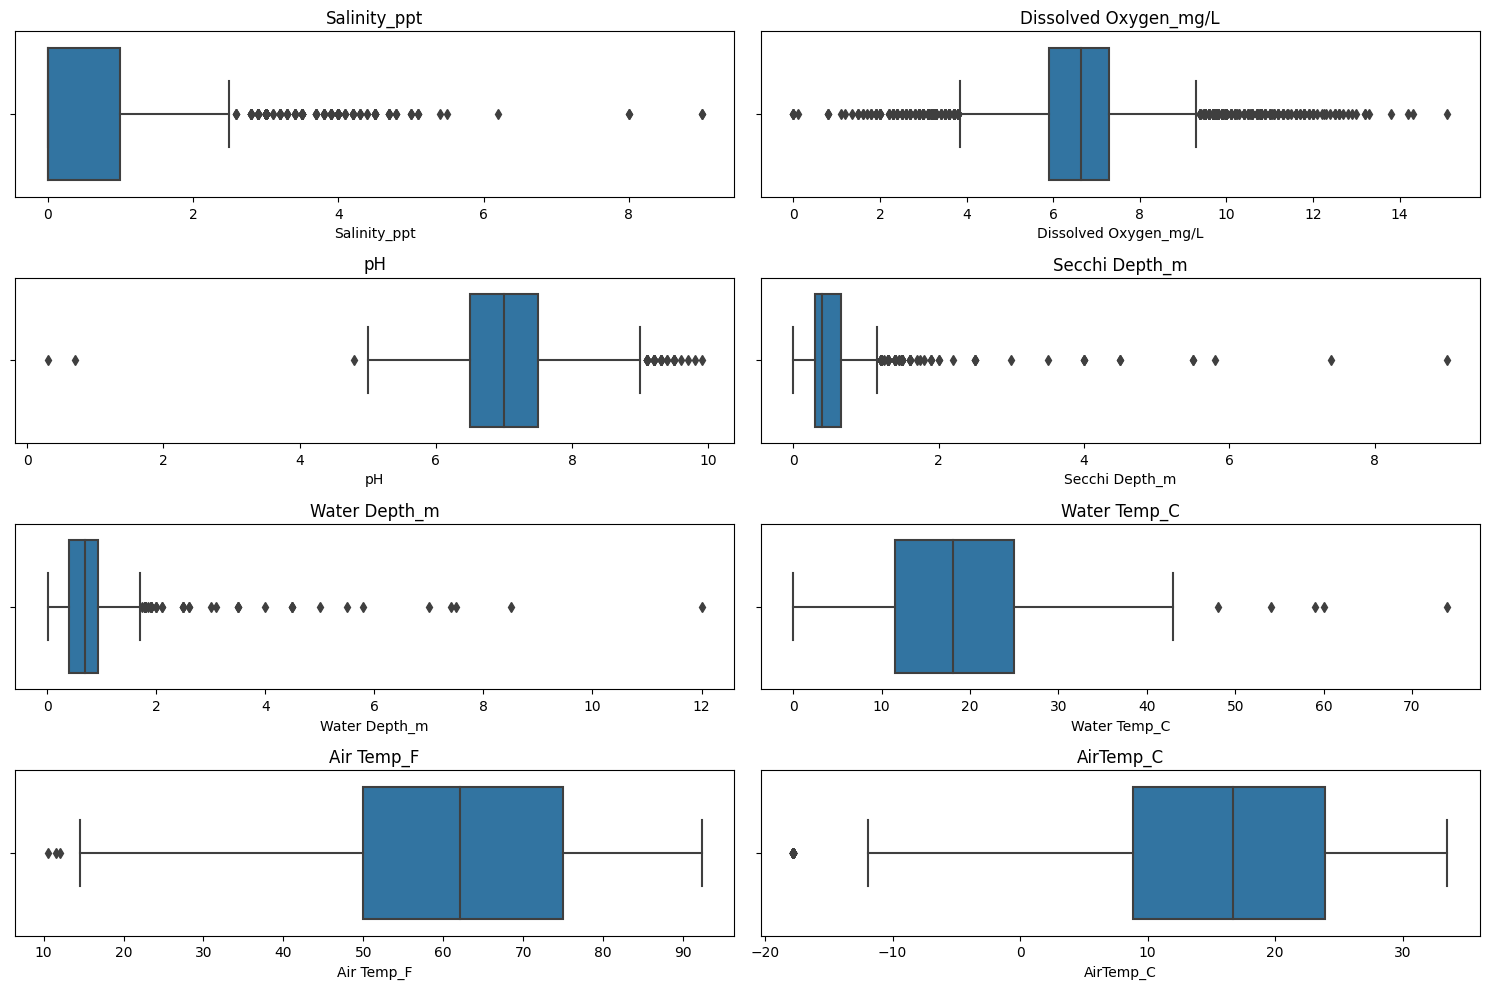

In [23]:
f, ax= plt.subplots(4,2 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data = df, x = cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

-------

**Average Dissolved oxygen by depth**

In [59]:
do_by_depth = df.groupby(['Water Depth_m'])['Dissolved Oxygen_mg/L'].mean().reset_index().sort_values('Water Depth_m', ascending = True)

In [60]:
do_by_depth

,Water Depth_m,Dissolved Oxygen_mg/L
0,0.01,4.615421
1,0.03,7.250000
2,0.05,5.869253
3,0.07,4.300000
4,0.10,6.380407
...,...,...
109,7.00,4.000000
110,7.40,8.800000
111,7.50,3.900000
112,8.50,7.100000


In [61]:
px.line(do_by_depth, x='Water Depth_m', y='Dissolved Oxygen_mg/L',markers=True, 
        title = 'Average Dissolved oxygen by depth')

**There is a big change in the amount of oxygen at low depths**

-------

**Average Water Temp by depth**

In [62]:
wt_by_depth = df.groupby(['Water Depth_m'])['Water Temp_C'].mean().reset_index().sort_values('Water Depth_m', ascending = True)

In [63]:
wt_by_depth

,Water Depth_m,Water Temp_C
0,0.01,23.666667
1,0.03,12.000000
2,0.05,19.952428
3,0.07,27.000000
4,0.10,23.388511
...,...,...
109,7.00,26.000000
110,7.40,20.000000
111,7.50,25.000000
112,8.50,9.000000


In [65]:
px.line(wt_by_depth, x='Water Depth_m', y='Water Temp_C',markers=True, 
        title = 'Average Water Temp by depth')

**There is a big change in the Water Temperature at low depths**

--------

**Changes in variables by year**

In [39]:
# Sort dates
df = df.sort_values(by='Read_Date',ascending=True)

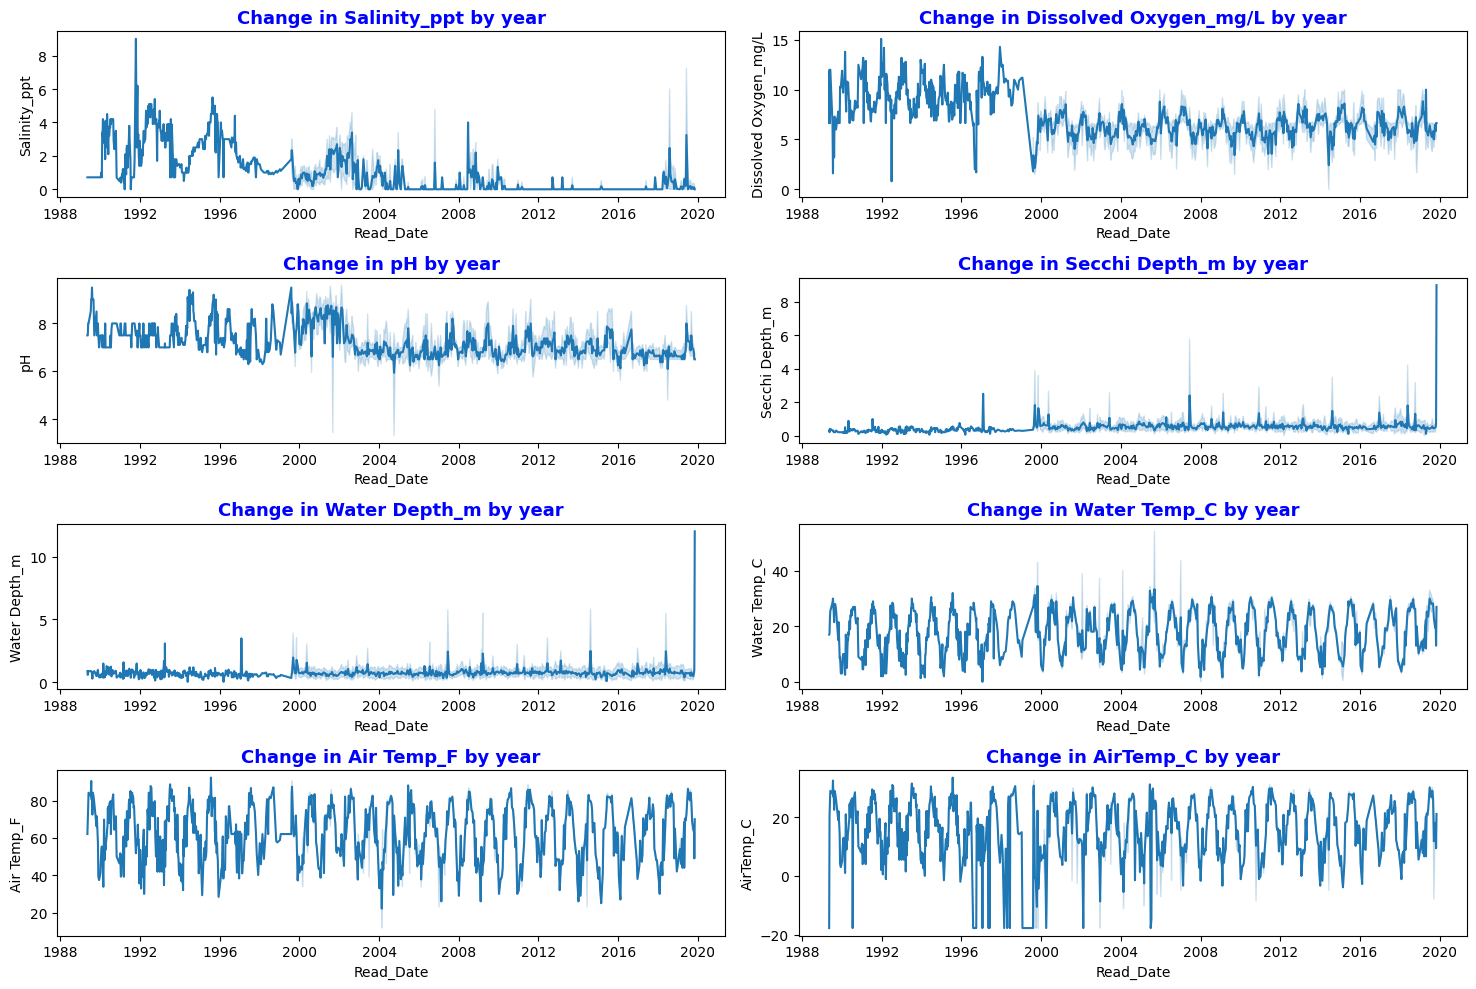

In [41]:
f, ax= plt.subplots(4,2 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.lineplot(data = df, x = 'Read_Date', y= cols , ax = ax[index])
    ax[index].set_title(f'Change in {cols} by year', fontsize=13, fontweight='bold', color='blue')
    
plt.tight_layout()
plt.show()

-------------

**Rolling Window Statistics by variables**

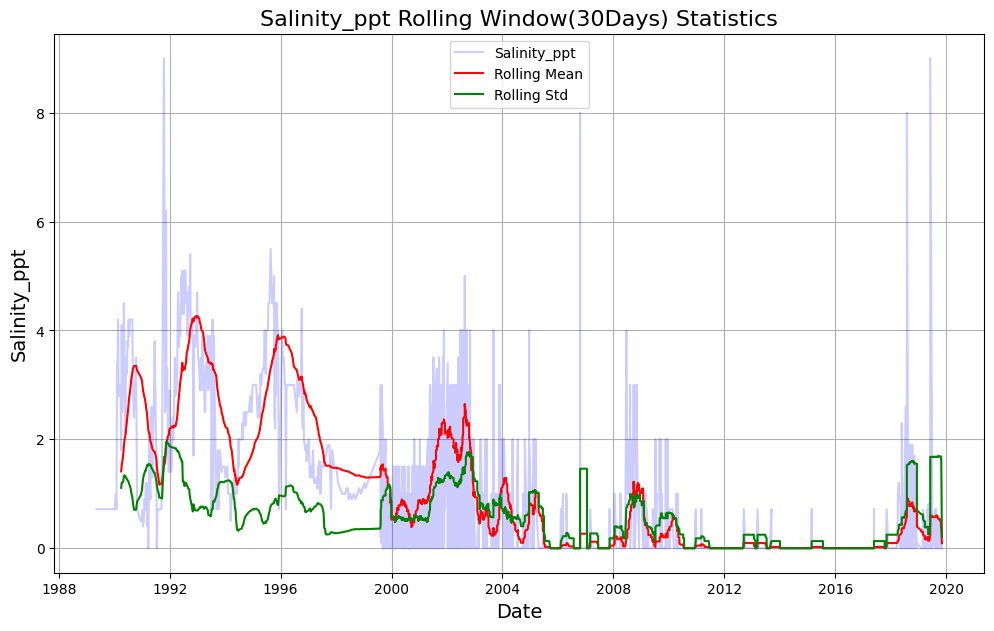

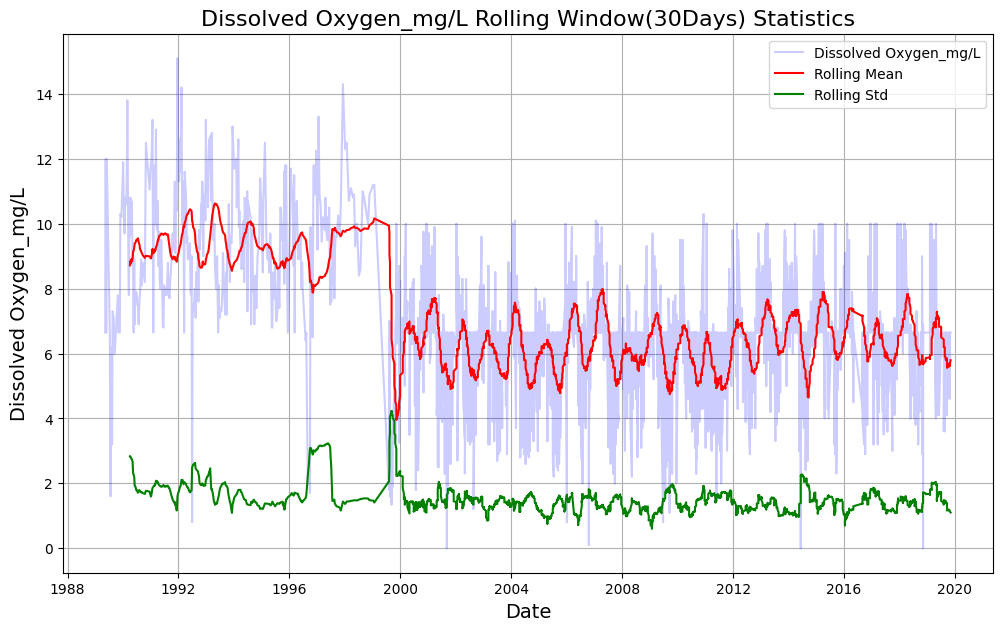

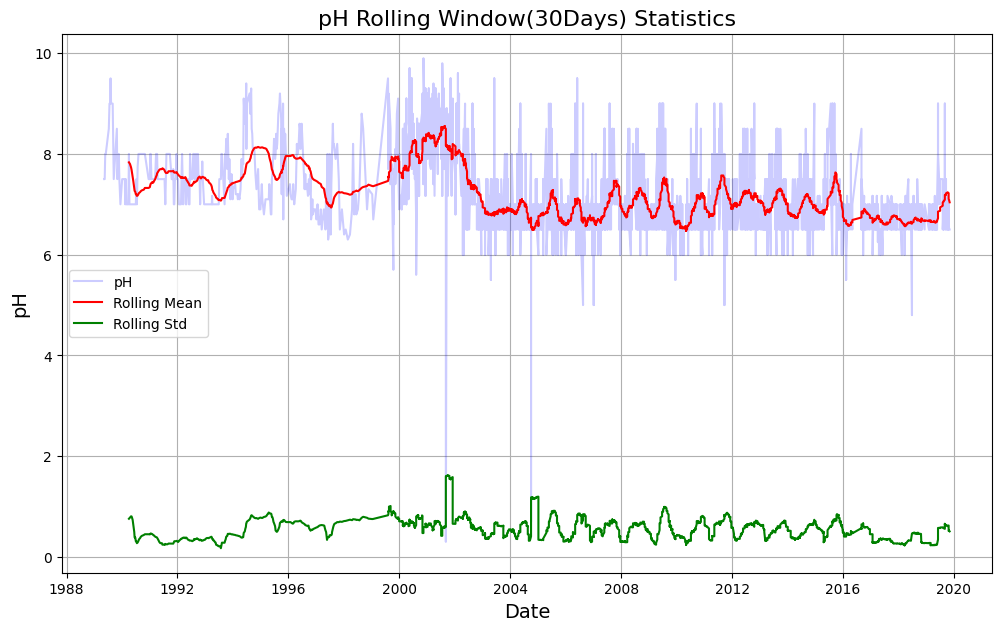

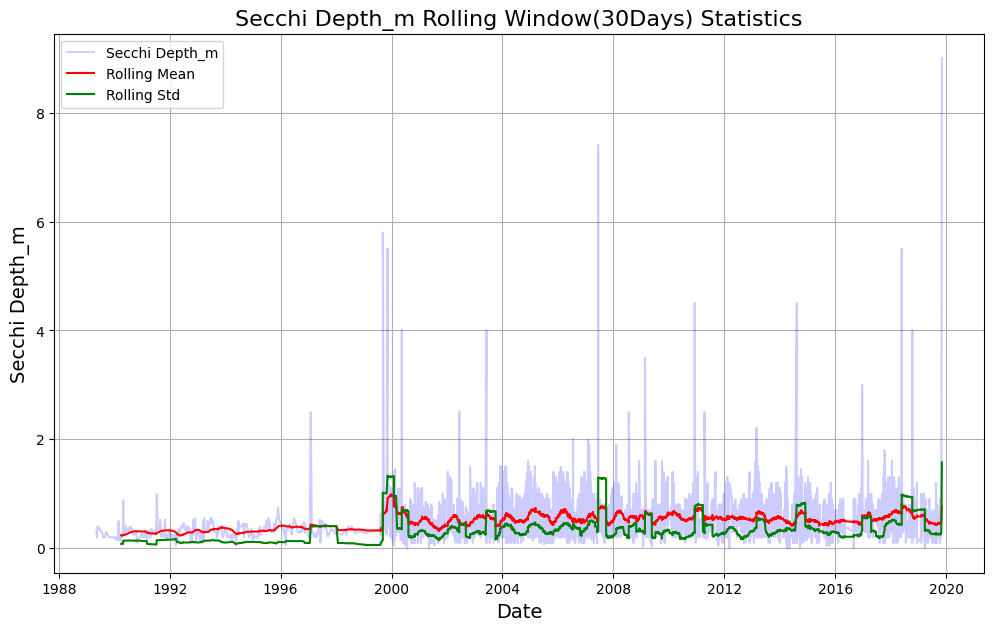

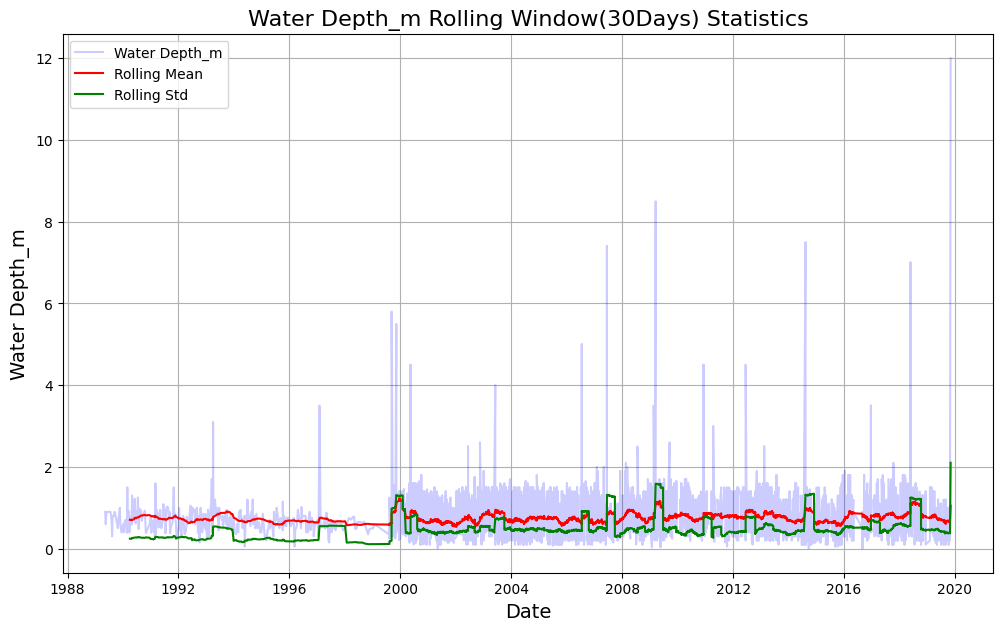

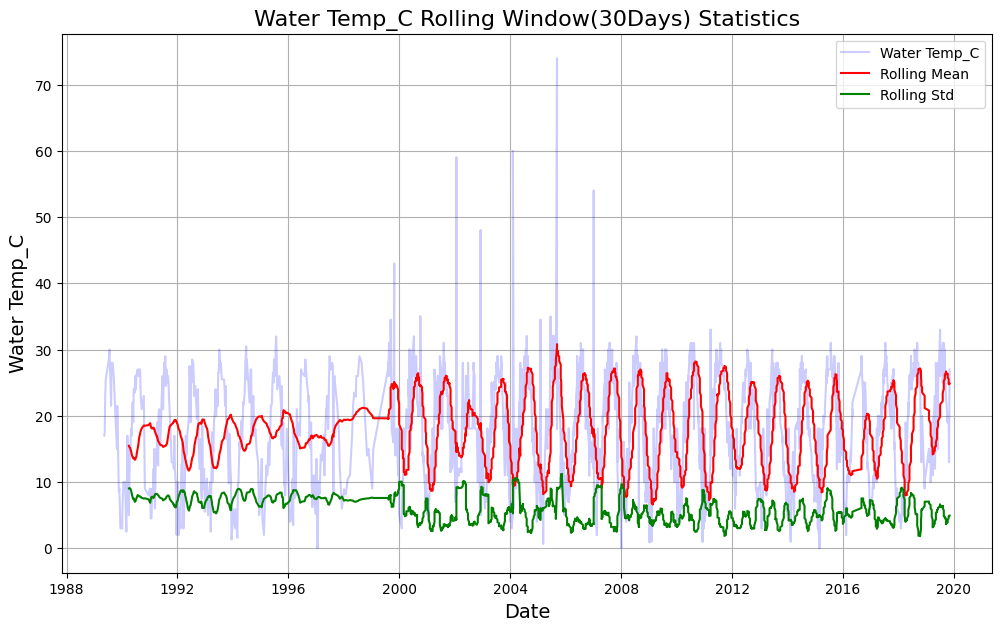

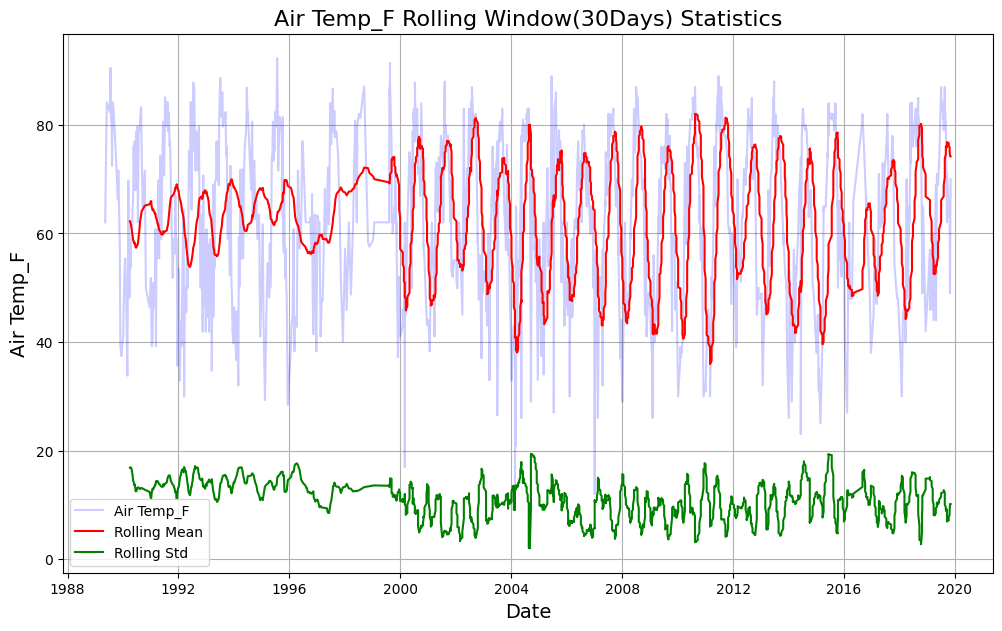

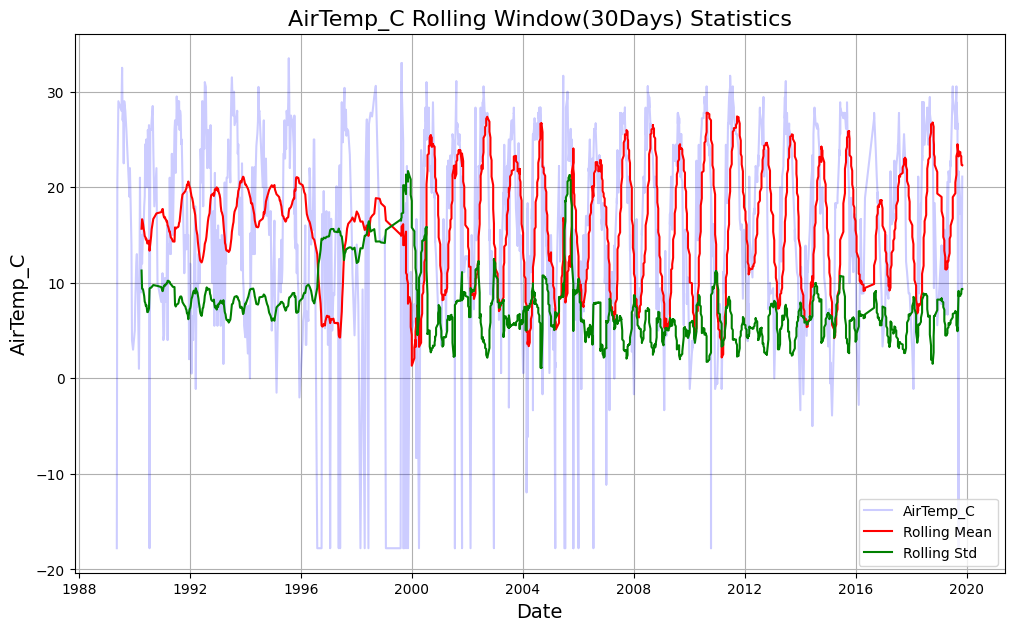

In [51]:
for index, cols in enumerate(num_cols):
    
    rolling_mean = df[cols].rolling(window=30).mean()
    rolling_std = df[cols].rolling(window=30).std()
    plt.figure(figsize=(12,7))
    
    plt.plot(df['Read_Date'], df[cols] , label= cols, color='blue' , alpha = 0.2)
    plt.plot(df['Read_Date'], rolling_mean, label= 'Rolling Mean', color='red')
    plt.plot(df['Read_Date'], rolling_std, label='Rolling Std', color='green')
    plt.title(f'{cols} Rolling Window(30Days) Statistics', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(cols, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

-------

**Variables Relationship**

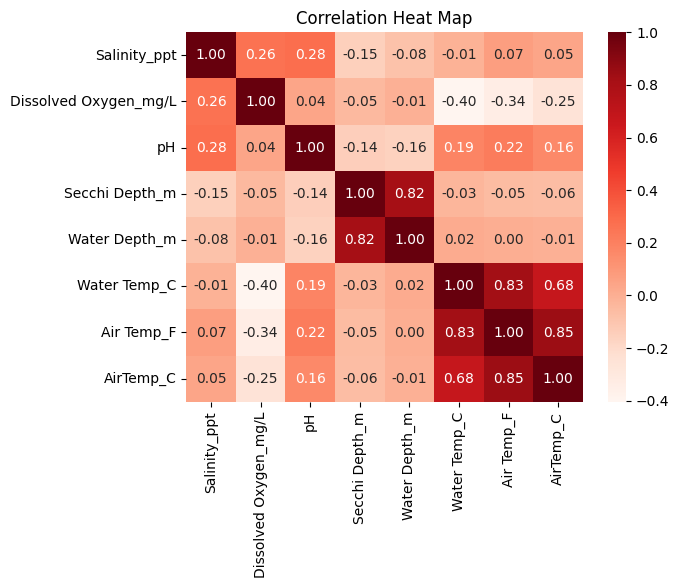

In [54]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Reds', fmt=".2f")
plt.title('Correlation Heat Map')
plt.show()

----------

In [185]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


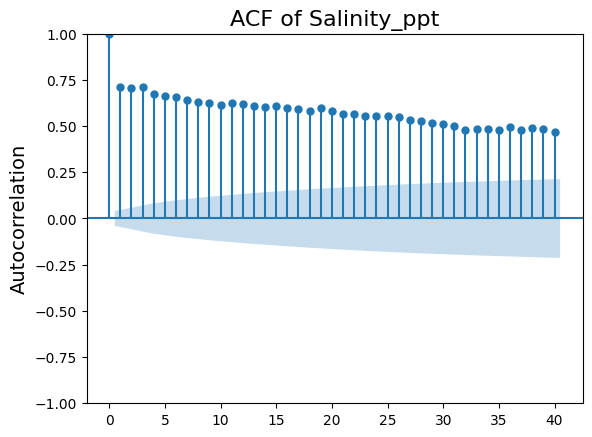

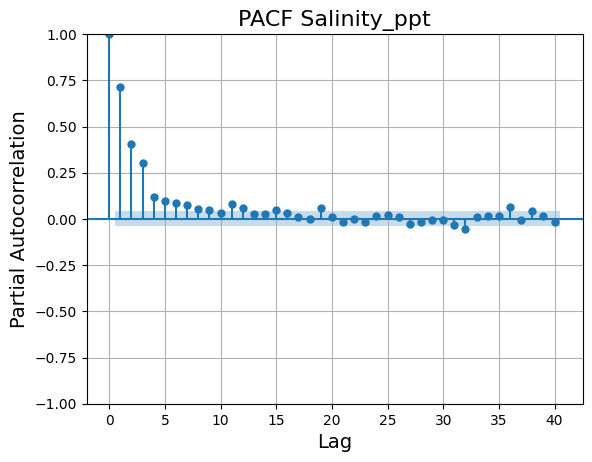

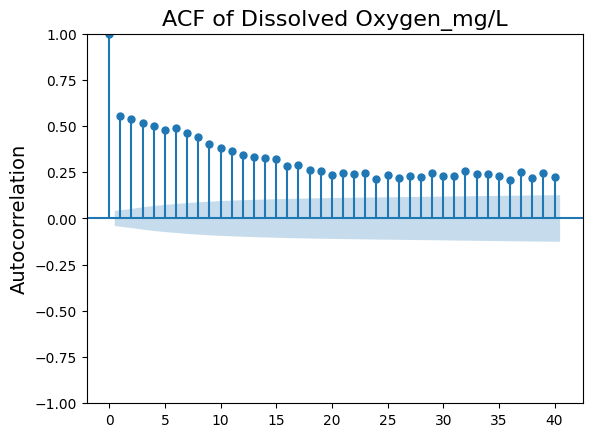

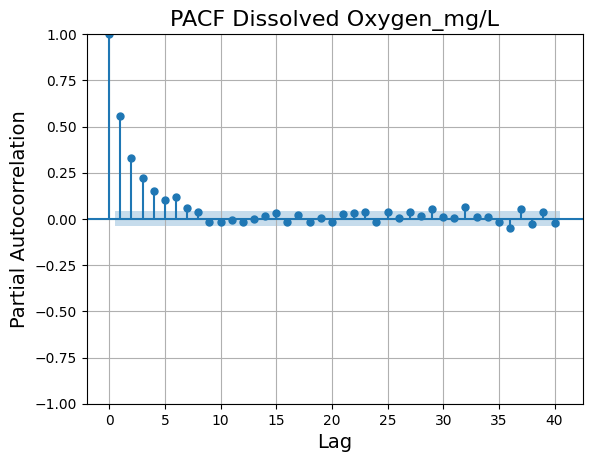

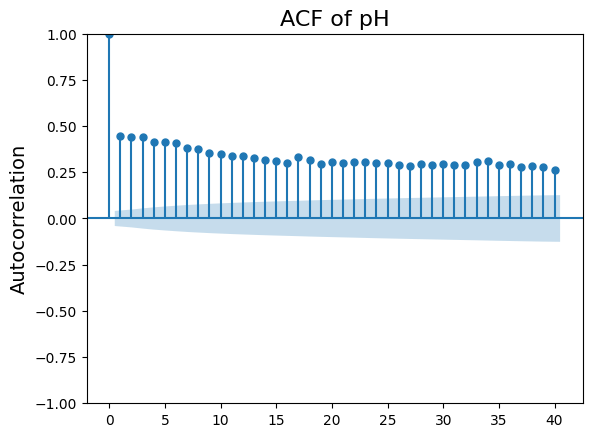

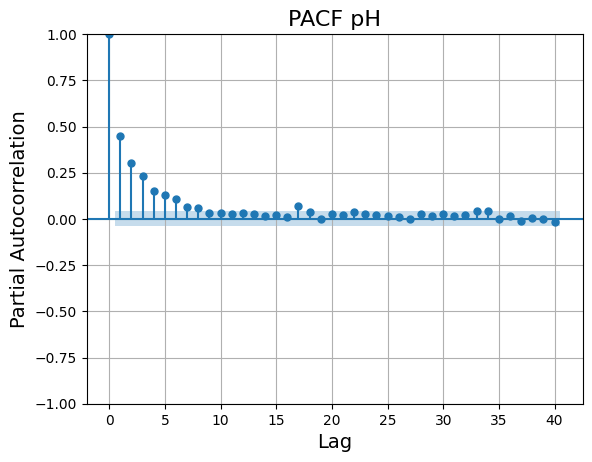

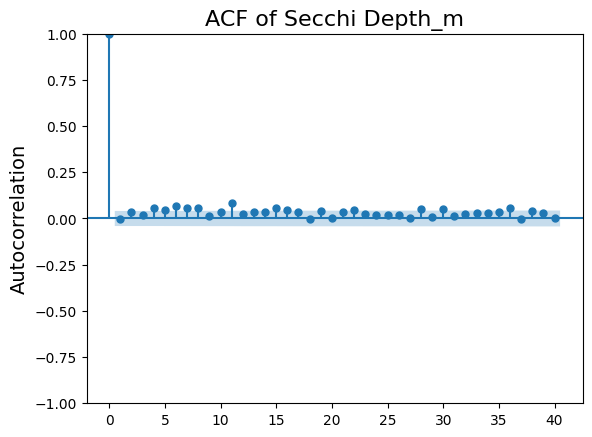

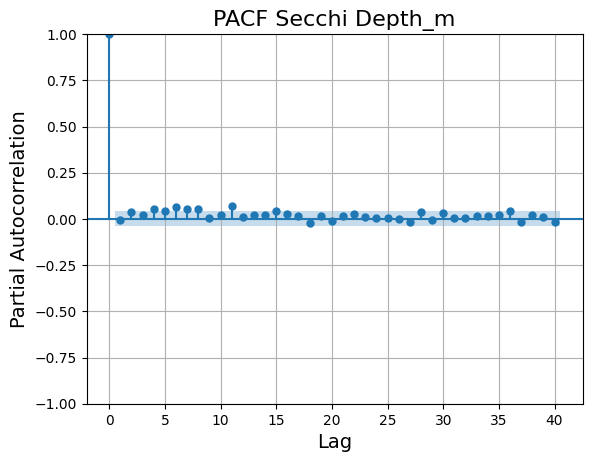

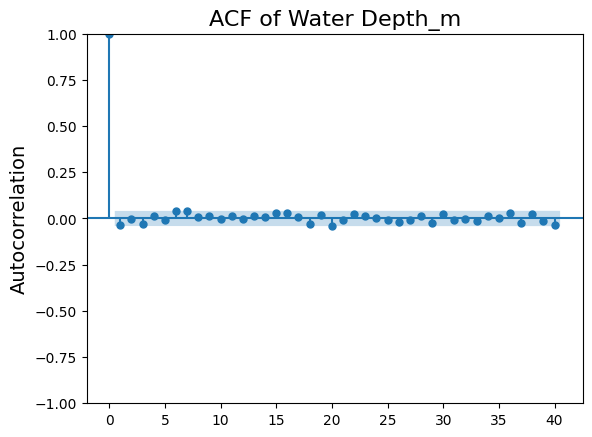

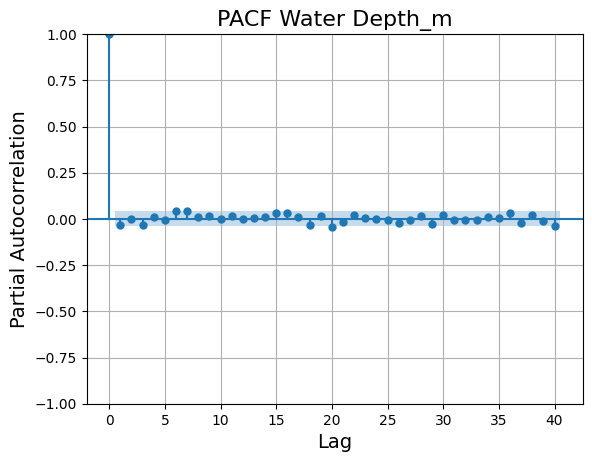

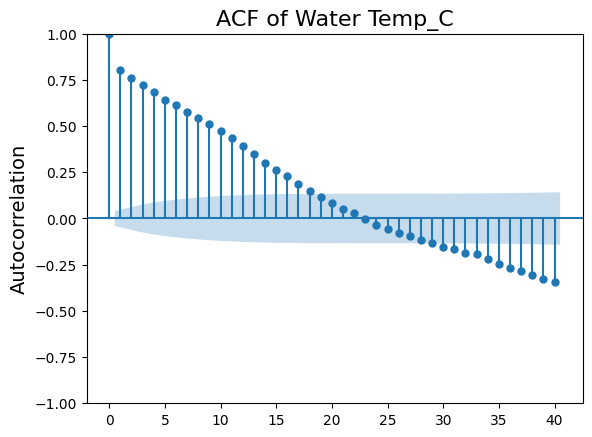

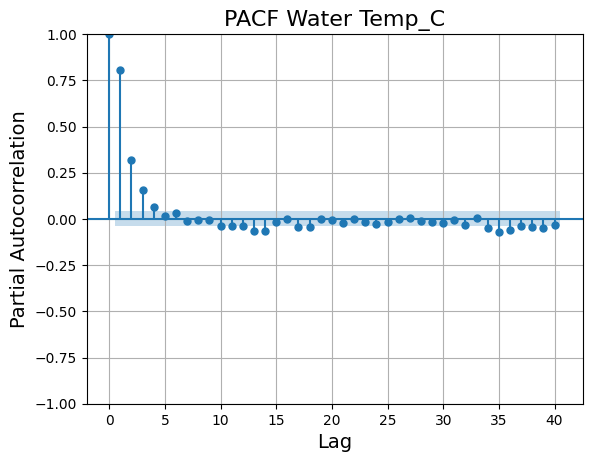

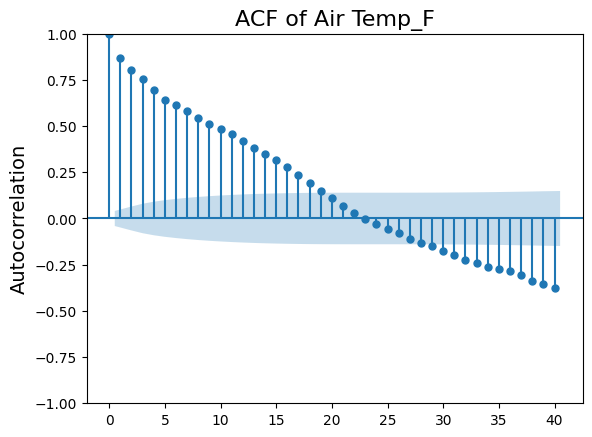

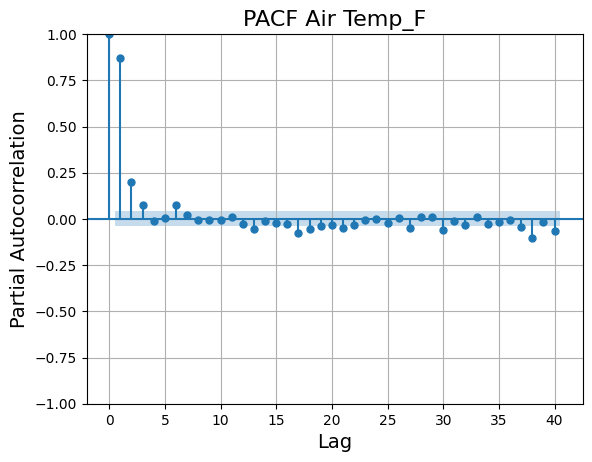

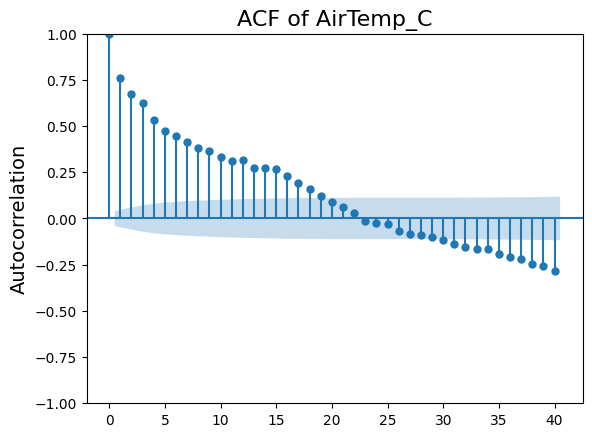

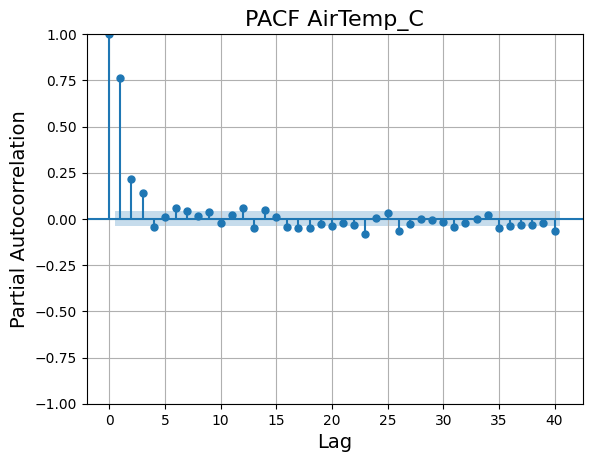

In [126]:
for index, cols in enumerate(num_cols):
    
    plot_acf(df[cols], lags=40, alpha=0.05)
    plt.title(f'ACF of {cols}', fontsize=16)
    plt.ylabel('Autocorrelation', fontsize=14)
    
    plot_pacf(df[cols], lags=40, alpha=0.05)
    plt.title(f'PACF {cols}', fontsize=16)
    plt.xlabel('Lag', fontsize=14)
    plt.ylabel('Partial Autocorrelation', fontsize=14)
    
    plt.grid(True)
    plt.show()

In [161]:
ts = df[['Read_Date', 'Dissolved Oxygen_mg/L']]
ts.set_index('Read_Date',inplace=True)

In [163]:
result = adfuller(ts)

In [168]:
f'ADF Statistic {result[0]}'

'ADF Statistic -6.835148372406065'

In [169]:
f'p-value {result[1]}'

'p-value 1.850661721690896e-09'

--------

**Please leave your advice in the comments. Thank you**